<a href="https://colab.research.google.com/github/Daanfara/andrade/blob/main/Exploring_Pandas_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1: Importar Datos

In [70]:
import pandas as pd

# Utiliza esta línea para cargar el conjunto de datos.
url='https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/cta_Ridership.csv'
df = pd.read_csv(url)


Paso 2: Exploración Básica con:
shape, head(), tail(), dtypes, type()


In [71]:
print("Shape:", df.shape)
print("\nHead:\n", df.head())
print("\nTail:\n", df.tail())
print("\nData Types:\n", df.dtypes)
print("\nType:\n", type(df))

Shape: (1145586, 5)

Head:
    station_id       stationname        date daytype  rides
0       41280    Jefferson Park  12/22/2017       W   6104
1       41000  Cermak-Chinatown  12/18/2017       W   3636
2       40280      Central-Lake  12/02/2017       A   1270
3       40140   Dempster-Skokie  12/19/2017       W   1759
4       40690          Dempster  12/03/2017       U    499

Tail:
          station_id        stationname        date daytype  rides
1145581       41700  Washington/Wabash  12/27/2022       W   3991
1145582       41700  Washington/Wabash  12/28/2022       W   4100
1145583       41700  Washington/Wabash  12/29/2022       W   4741
1145584       41700  Washington/Wabash  12/30/2022       W   4664
1145585       41700  Washington/Wabash  12/31/2022       A   2774

Data Types:
 station_id      int64
stationname    object
date           object
daytype        object
rides           int64
dtype: object

Type:
 <class 'pandas.core.frame.DataFrame'>


Paso 3: Estadisticas Básicas

In [72]:
print("\nDescribe:\n", df.describe())


Describe:
          station_id         rides
count  1.145586e+06  1.145586e+06
mean   4.076649e+04  3.056635e+03
std    4.490665e+02  3.118576e+03
min    4.001000e+04  0.000000e+00
25%    4.037000e+04  9.630000e+02
50%    4.076000e+04  2.004000e+03
75%    4.115000e+04  4.025000e+03
max    4.170000e+04  3.632300e+04


Paso 4: Selección basada en condiciones usando los módulos min() y max()


In [73]:

max_rides_station = df.loc[df['rides'].idxmax()]['stationname']
min_rides_station = df.loc[df['rides'].idxmin()]['stationname']
print("\nStation with Max Rides:", max_rides_station)
print("Station with Min Rides:", min_rides_station)



Station with Max Rides: Belmont-North Main
Station with Min Rides: Randolph/Wabash


Paso 5: Crear un índice de tiempo

Entonces tenemos todos los viajes desde el 1 de enero de 2001 hasta el 31 de diciembre de 2019. Hagamos algunas estadísticas que agrupen las estadísticas de viajes por fecha. Primero debemos decirle a Pandas que la columna de fecha es en realidad una fecha. Entonces, convertimos la columna a un tipo 'DateTime' adecuado y luego configuramos el índice para esta columna.


In [74]:
# pista, usa los módulos to_datetime() y set_index()
# tu código aquí
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Imprime el DataFrame después de establecer el índice de tiempo
print(df.head())



            station_id       stationname daytype  rides
date                                                   
2017-12-22       41280    Jefferson Park       W   6104
2017-12-18       41000  Cermak-Chinatown       W   3636
2017-12-02       40280      Central-Lake       A   1270
2017-12-19       40140   Dempster-Skokie       W   1759
2017-12-03       40690          Dempster       U    499


Paso 6: Ordena el DataFrame por fecha

In [75]:
df.sort_values(by='date', inplace=True)

Paso 7: Verificación de cordura

In [76]:

Garfield_Dan_Ryan = df[df['stationname']=='Garfield-Dan Ryan']

Garfield_South_Elevated = df[df['stationname']=='Garfield-South Elevated']


Paso 8: Visualización de datos de series temporales

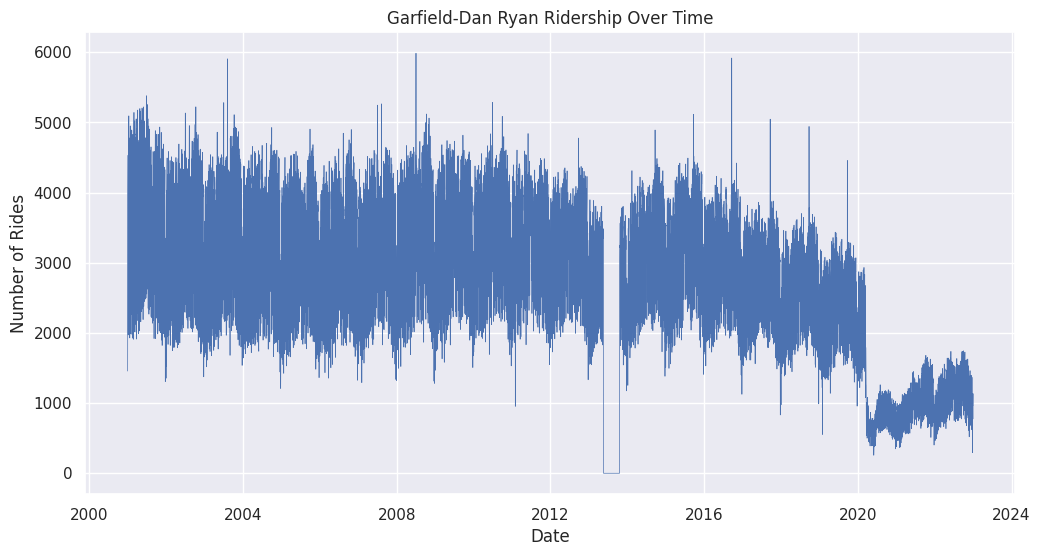

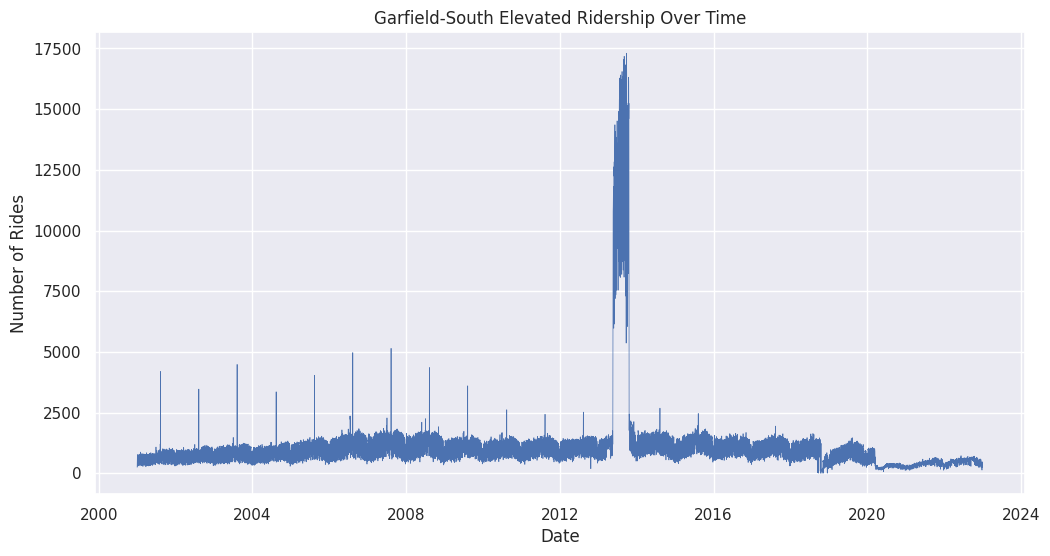

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño de la figura
sns.set(rc={'figure.figsize':(11, 4)})

# Visualiza la serie temporal para 'Garfield-Dan Ryan'
plt.figure(figsize=(12,6))
plt.plot(Garfield_Dan_Ryan['rides'], linewidth=0.5)
plt.title('Garfield-Dan Ryan Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()

# Visualiza la serie temporal para 'Garfield-South Elevated'
plt.figure(figsize=(12,6))
plt.plot(Garfield_South_Elevated['rides'], linewidth=0.5)
plt.title('Garfield-South Elevated Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()

